In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('portfolio_optimization_results.csv')
# Convert the 'Optimized_b' column from strings to lists of floats
df['Optimized_b'] = df['Optimized_b'].apply(lambda x: np.fromstring(x[1:-1], sep=', '))


# Multiply the expected returns by 100
df['Optimized_Returns'] *= 100
# Multiply the minimum variance by 100 squared
df['Minimum_Variance'] *= 100**2
# Calculate the standard deviation from the variance
df['Standard_Deviation'] = np.sqrt(df['Minimum_Variance'])

# round up
df['Optimized_b'] = df['Optimized_b'].apply(lambda x: np.round(x, 4))

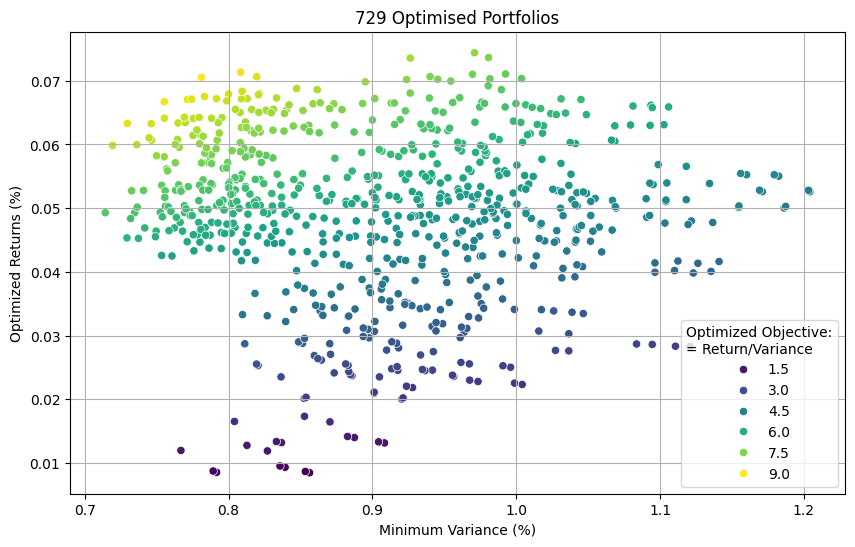

In [17]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Minimum_Variance', y='Optimized_Returns', hue='Optimized_Objective', palette='viridis', legend='brief')
plt.xlabel('Minimum Variance (%)')
plt.ylabel('Optimized Returns (%)')
plt.title('729 Optimised Portfolios')
plt.grid(True)
plt.legend(title='Optimized Objective:\n= Return/Variance')
plt.show()


In [11]:
# Get the portfolio with the highest optimized objective value
best_portfolio_by_objective = df.loc[df['Optimized_Objective'].idxmax()]
# Get the portfolio with the highest optimized returns
best_portfolio_by_returns = df.loc[df['Optimized_Returns'].idxmax()]
# Get the portfolio with the lowest minimum variance
best_portfolio_by_variance = df.loc[df['Minimum_Variance'].idxmin()]

print("Best Portfolio by Optimized Objective Value:")
print(best_portfolio_by_objective)

print("\nBest Portfolio by Optimized Returns:")
print(best_portfolio_by_returns)

print("\nBest Portfolio by Minimum Variance:")
print(best_portfolio_by_variance)

Best Portfolio by Optimized Objective Value:
Combination            ('SUN', 'BWP', 'CPU', 'VEA', 'CSL', 'GNC')
Optimized_b                [0.2169, 0.1, 0.2462, 0.237, 0.1, 0.1]
Optimized_Objective                                      9.030287
Optimized_Returns                                        0.070545
Minimum_Variance                                         0.781207
Standard_Deviation                                       0.883859
Name: 16, dtype: object

Best Portfolio by Optimized Returns:
Combination            ('SUN', 'GPT', 'WTC', 'VEA', 'CSL', 'GNC')
Optimized_b                  [0.3238, 0.1, 0.1, 0.2762, 0.1, 0.1]
Optimized_Objective                                      7.663281
Optimized_Returns                                        0.074413
Minimum_Variance                                         0.971039
Standard_Deviation                                       0.985413
Name: 151, dtype: object

Best Portfolio by Minimum Variance:
Combination            ('SUN', 'BWP', '